<a href="https://colab.research.google.com/github/PatriciaRoxana/Big-data-lab1/blob/main/Laboratorio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import os
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.datasets import make_moons, make_circles
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:

ruta_de_archivos = '/content/drive/MyDrive/big data/Laboratorio 2/Canciones_Spotify.csv'
ruta_completa = os.path.join(ruta_de_archivos)  # Ruta completa al archivo
df = pd.read_csv(ruta_completa)  # Cargar el archivo CSV en un DataFrame
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [3]:
df1= df.copy()

In [ ]:
df1.info()

In [5]:

# Convertir datos no numéricos en NaN
df1['target'] = pd.to_numeric(df1['target'], errors='coerce')

# Eliminar filas con NaN en 'target'
df1.dropna(subset=['target'])


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


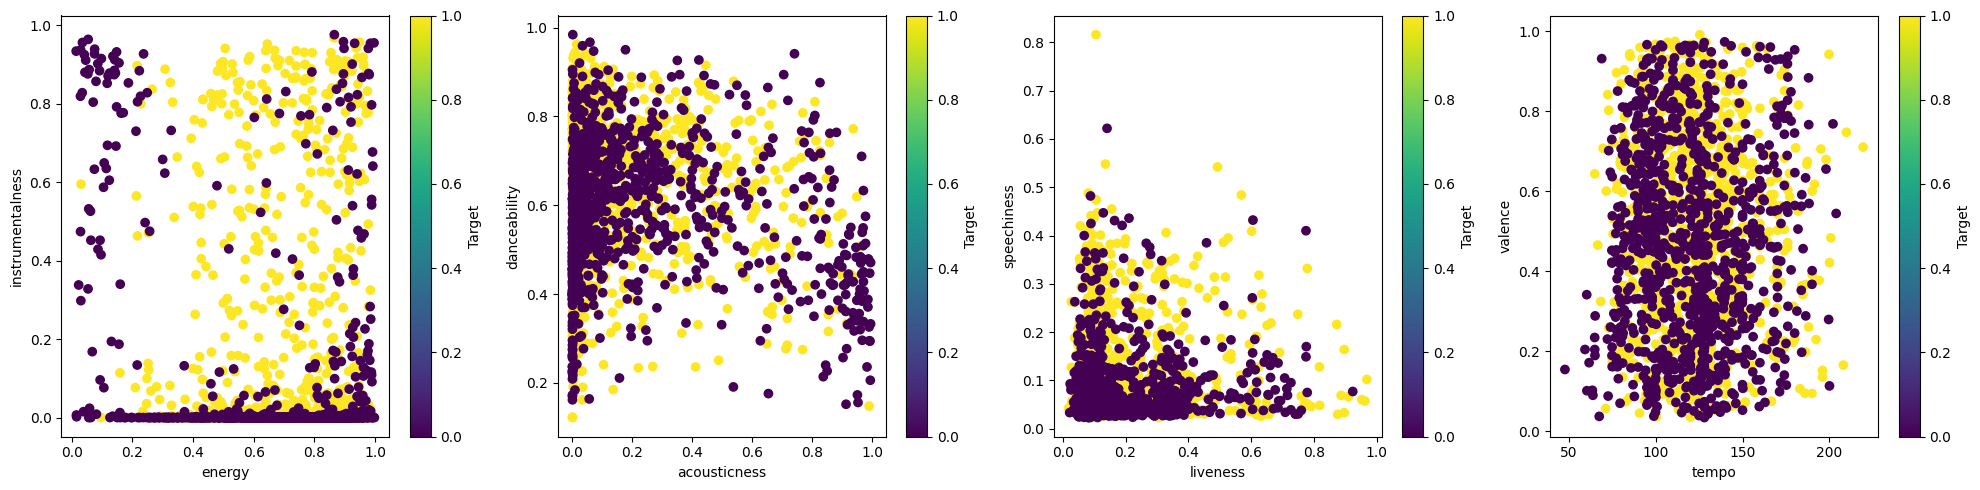

In [21]:
import matplotlib.pyplot as plt

# Lista de columnas para x e y
column_pairs = [
    ( "energy","instrumentalness"),
    ("acousticness", "danceability"),
    ("liveness", "speechiness"),
    ("tempo", "valence")
]

# Crear la figura y especificar el tamaño total
plt.figure(figsize=(20, 5))  # 5x4 para cada gráfico, 4 gráficos en total

# Iterar sobre cada par de columnas
for i, (x_column, y_column) in enumerate(column_pairs, 1):  # i empieza en 1
    # Crear un subplot
    plt.subplot(1, 4, i)  # 1 fila, 4 columnas, índice i

    # Crear scatter plot
    plt.scatter(df1[x_column], df1[y_column], c=df1['target'])

    # Agregar colorbar
    plt.colorbar(label='Target')

    # Etiquetas
    plt.xlabel(x_column)
    plt.ylabel(y_column)

# Mostrar todos los gráficos
plt.tight_layout()  # ajusta el espacio entre gráficos para evitar superposición
plt.show()



In [27]:
# Separar las variables (X) del objetivo/target (y)
X = df1.drop(columns=['target', 'song_title', 'artist', 'Unnamed: 0'])  # Eliminamos las columnas no numéricas y target
y = df1['target']

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separar los datos en entrenamiento, prueba y validación
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Modelo SVM
kernels = ['linear', 'rbf']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("Accuracy using {}:".format(kernel), accuracy_score(pred, y_test))


Accuracy using linear: 0.6428571428571429
Accuracy using rbf: 0.7202380952380952


Kernel: linear C: 0.1 Gamma: 0.1
Kernel: linear C: 0.1 Gamma: 1
Kernel: linear C: 0.1 Gamma: 20
Kernel: rbf C: 0.1 Gamma: 0.1
Kernel: rbf C: 0.1 Gamma: 1
Kernel: rbf C: 0.1 Gamma: 20
Kernel: linear C: 1 Gamma: 0.1
Kernel: linear C: 1 Gamma: 1
Kernel: linear C: 1 Gamma: 20
Kernel: rbf C: 1 Gamma: 0.1
Kernel: rbf C: 1 Gamma: 1
Kernel: rbf C: 1 Gamma: 20
Kernel: linear C: 50 Gamma: 0.1
Kernel: linear C: 50 Gamma: 1
Kernel: linear C: 50 Gamma: 20
Kernel: rbf C: 50 Gamma: 0.1
Kernel: rbf C: 50 Gamma: 1
Kernel: rbf C: 50 Gamma: 20


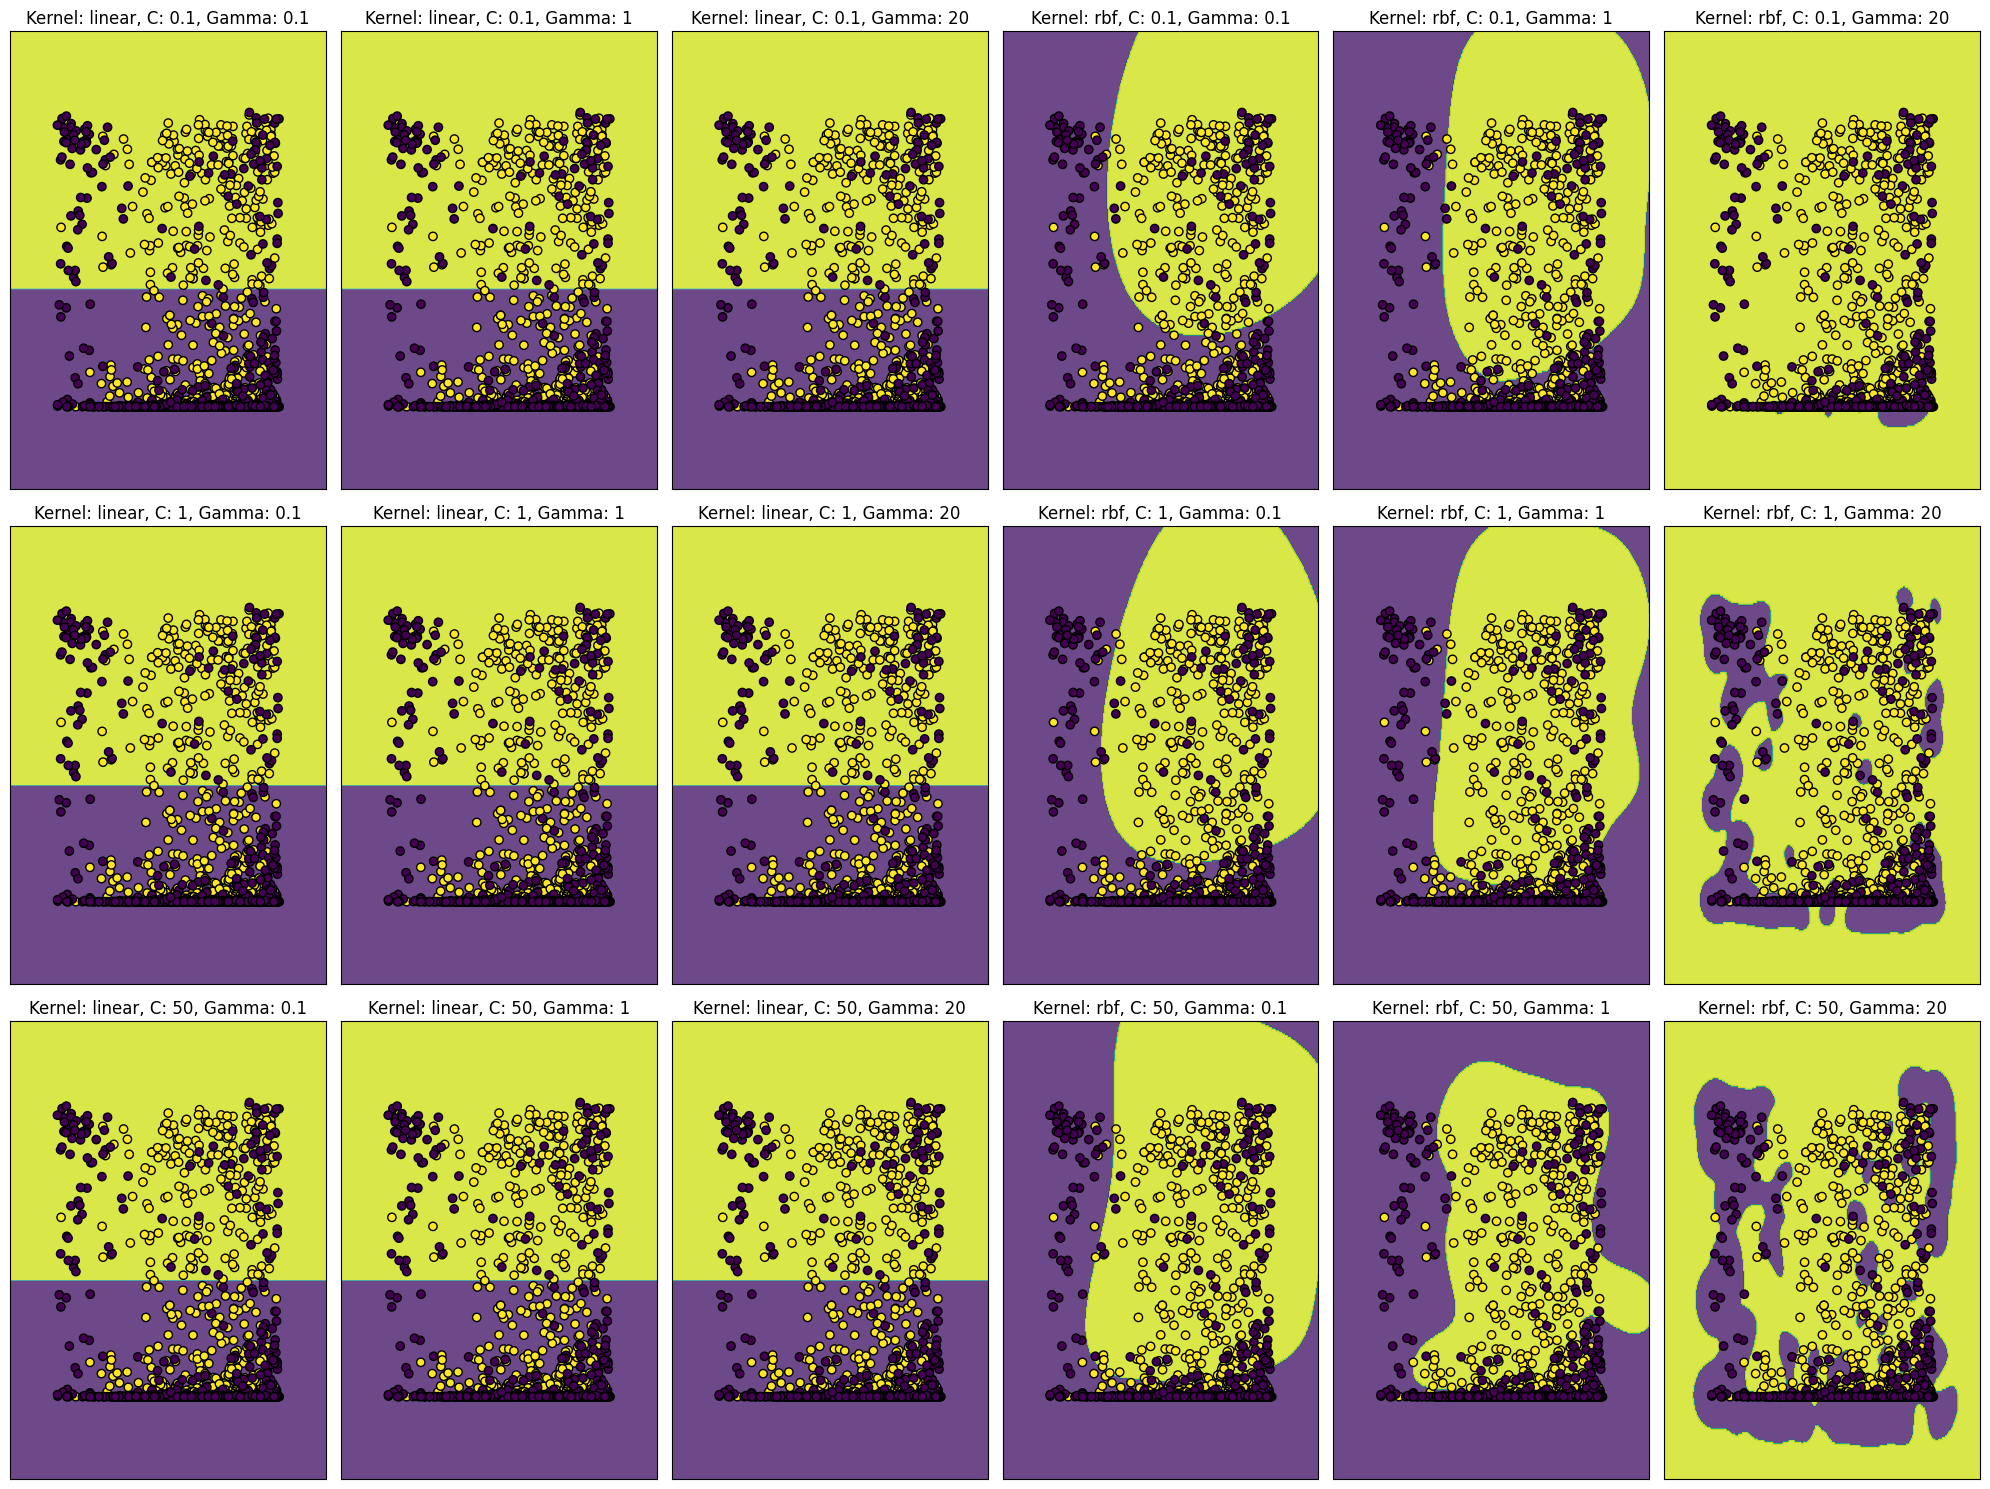

In [26]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Cargamos el DataFrame (puedes ignorar esta parte si ya tienes tu DataFrame df cargado)
# ...

# Seleccionamos las características y el target
X = df1[["energy","instrumentalness"]].values
y = df1['target'].values

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separar los datos
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Función para graficar la frontera de decisión
def plot_decision_boundary(clf, X, y, ax, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_title(title)

kernels = ['linear', 'rbf']
C_values = [0.1, 1, 50]
gamma_values = [0.1, 1, 20]

fig, axes = plt.subplots(nrows=len(C_values), ncols=len(gamma_values) * len(kernels), figsize=(20,15))

for i, C_val in enumerate(C_values):
    for k, kernel in enumerate(kernels):
        for j, gamma_val in enumerate(gamma_values):

            model = SVC(kernel=kernel, C=C_val, gamma=gamma_val)
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            print("Kernel:", kernel, "C:", C_val, "Gamma:", gamma_val)

            col_index = j + k * len(gamma_values)
            title = ('Kernel: {}, C: {}, Gamma: {}'.format(kernel, C_val, gamma_val))
            plot_decision_boundary(model, X, y, axes[i, col_index], title)
            axes[i, col_index].set_xticks(())
            axes[i, col_index].set_yticks(())

plt.tight_layout()
plt.show()
